Pour évaluer la complexité de nos algorithmes de tri, nous allons en général nous intéresser à deux mesures, le nombre de comparaisons et le nombre d'échanges ou, quand c'est plus pertinent, le nombre d'écritures dans le tableau. 

Pour évaluer expérimentalement ces valeurs, nous réécrivons l'algorithme de tri pour qu'il les compte.

In [1]:
def tri_a_bulles(T):
    nb_comparaisons = nb_echanges = 0
    
    N = len(T)
    for k in range(N,1,-1):                 
        for i in range(0,k-1): 
            nb_comparaisons += 1
            if T[i] > T[i+1]:
                nb_echanges += 1
                T[i],T[i+1] = T[i+1],T[i]
    return nb_comparaisons, nb_echanges

Pour visualiser ces mesures, nous écrivons une fonction d'affichage avec la librairie matplotlib. Elle affiche également en pointillé les fonctions linéaires, linéarithmique et quadratique pour faciliter l'interprétation des mesures. Cette fonction sera importée d'un fichier annexe pour les tris suivants

In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

def affiche_complexite(X,C1,C2,titre):
    
    X2 = [ x*x for x in X ]
    XlogX = [ x*np.log2(x) for x in X ]

    plt.title("Complexité du {}".format(titre))
    plt.loglog(X,C1,label='comparaisons')
    plt.loglog(X,C2,label='echanges')
    plt.loglog(X,X2,label='quadratique',linestyle='dotted')
    plt.loglog(X,XlogX,label='linéarithmique',linestyle='dotted')
    plt.loglog(X,X,label='linéaire',linestyle='dotted')
    plt.legend()
    plt.show() 
        
    print("{:>5} |{:>10} |{:>10}".format("N","Comp.","Ech."))
    print("-------------------------------")
    for i,(x,c1,c2) in enumerate(zip(X,C1,C2)):
        if i % int(len(X)/7) == 0:
            print("{:>5} |{:>10} |{:>10}".format(x,c1,c2))

Enfin, il convient d'effectuer les mesures pour diverses tailles de tableau et éventuellement divers contenus. La fonction qui suit teste 50 tailles allant de 10 à 1000 selon une progression géométrique (facteur multiplicatif constant). Générer le contenu du tableau est sous-traité à la fonction genere_tab passée en paramètre. 

In [3]:
def evalue_complexite(algorithme, genere_tab, nom):
    
    C1 = []
    C2 = []
    X = [ int(x) for x in np.logspace(1,3,50) ]
    
    for n in X:
        T = genere_tab(n)
        comp, ech = algorithme(T)
        C1.append(comp)
        C2.append(ech)
    
    affiche_complexite(X,C1,C2,nom)

Evaluons d'abord la complexité du tri d'un tableau au contenu généré aléatoirement.

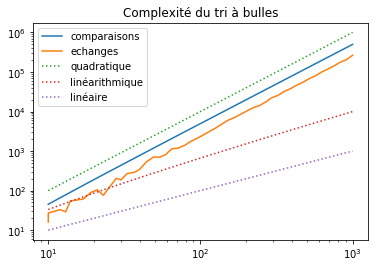

    N |     Comp. |      Ech.
-------------------------------
   10 |        45 |        16
   19 |       171 |        89
   37 |       666 |       291
   71 |      2485 |      1182
  138 |      9453 |      4795
  268 |     35778 |     17367
  517 |    133386 |     67449
 1000 |    499500 |    265203


In [4]:
def tableau_aleatoire(n):
    return np.random.uniform(0,1,n)
    
evalue_complexite(tri_a_bulles, tableau_aleatoire, "tri à bulles")

Nous voyons que tant le nombre de comparaisons que le nombre d'échanges ont une complexité quadratique $\Theta(n^2)$ pour trier $n$ éléments. Pour être plus précis, le nombre de comparaisons est exactement $n(n-1)/2$ tandis que le nombre d'échanges varie selon le contenu mais est de l'ordre de $n^2/4$

Il sera souvent pertinent d'effectuer deux autres tests pour évaluer la complexité de nos algorithmes. Le premier consiste à trier un tableau déjà parfaitement trié.

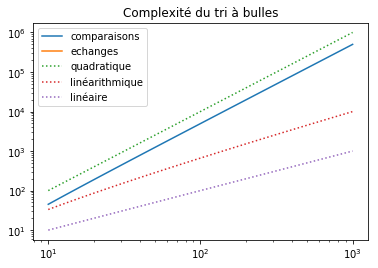

    N |     Comp. |      Ech.
-------------------------------
   10 |        45 |         0
   19 |       171 |         0
   37 |       666 |         0
   71 |      2485 |         0
  138 |      9453 |         0
  268 |     35778 |         0
  517 |    133386 |         0
 1000 |    499500 |         0


In [5]:
def tableau_trie(n):
    return range(n)
    
evalue_complexite(tri_a_bulles, tableau_trie, "tri à bulles")

On remarque que si le nombre de comparaisons ne dépend pas du contenu du tableau, le nombre d'échanges est maintenant uniformément nul. 

Le deuxième cas particulier intéressant est celui d'un tableau original trié à l'envers, i.e. dans l'ordre décroissant.

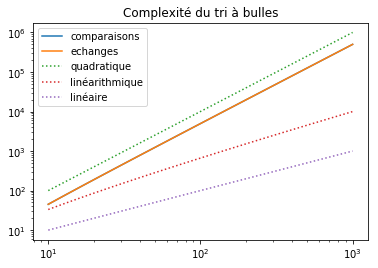

    N |     Comp. |      Ech.
-------------------------------
   10 |        45 |        45
   19 |       171 |       171
   37 |       666 |       666
   71 |      2485 |      2485
  138 |      9453 |      9453
  268 |     35778 |     35778
  517 |    133386 |    133386
 1000 |    499500 |    499500


In [6]:
def tableau_trie_inverse(n):
    return list(range(n,0,-1))
    
evalue_complexite(tri_a_bulles, tableau_trie_inverse, "tri à bulles")

On se trouve maintenant avec un nombre de comparaisons toujours inchangé mais un nombre d'échanges égal au nombre de comparaisons. Tous les tests de comparaisons renvoient `True` et il y a donc échange à chaque fois. 

Notons que cela ne change rien à la complexité du tri à bulles qui est toujours dominée par celle du nombre d'échange, et est donc **quadratique indépendemment du contenu à trier.**